# TUGAS ASSIGNMENT PYTHON 3
### NAMA : JONATHAN ADIWINATA
### KODE PESERTA : PYTN-KS12-013
### UNIVERSITAS LAMBUNG MANGKURAT

In [2]:
#Install dan import libraries yang digunakan
import numpy as np
import statistics
import math
import scipy.stats
import pandas as pd

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Mengimport data
# Data ini merupakan data terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon.
data = pd.read_excel('C:/Kuliah/Studi Independen/bank-additional-full.xlsx')
data.head() # memanggil bagian kepala data 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93994.0,-36.4,4857.0,5191.0,no


In [4]:
data.tail() #meamnggil bagian ekor data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94767.0,-50.8,1028.0,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94767.0,-50.8,1028.0,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94767.0,-50.8,1028.0,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94767.0,-50.8,1028.0,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94767.0,-50.8,1028.0,4963.6,no


In [5]:
data.shape #mengecek dimensi data

(41188, 21)

In [6]:
data.duplicated().sum() #mengecek jumlah data yang memiliki duplicate

12

In [7]:
data = data.drop_duplicates(data.columns, keep='last') #melalukan drop pada data yang memiliki duplicate
sum(data.duplicated(data.columns)) #menghitung jumlah data yang duplicate setelah dihapus

0

In [8]:
data.duplicated().value_counts() #mengecek apakah masih terdapat data duplicated pada data dan hasilnya tidak ada

False    41176
dtype: int64

In [9]:
data.dtypes #mengecek tipe data apa saja yg ada pada variabel

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [10]:
# Melakukan drop pada kolom data yang tidak digunakan agar mengurangi data lebih sedikit
data.drop(['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], axis = 1, inplace=True)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,yes


In [11]:
#Dimensi dan variabel data
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          41176 non-null  int64 
 1   job          41176 non-null  object
 2   marital      41176 non-null  object
 3   education    41176 non-null  object
 4   default      41176 non-null  object
 5   housing      41176 non-null  object
 6   loan         41176 non-null  object
 7   contact      41176 non-null  object
 8   month        41176 non-null  object
 9   day_of_week  41176 non-null  object
 10  duration     41176 non-null  int64 
 11  campaign     41176 non-null  int64 
 12  pdays        41176 non-null  int64 
 13  previous     41176 non-null  int64 
 14  poutcome     41176 non-null  object
 15  y            41176 non-null  object
dtypes: int64(5), object(11)
memory usage: 5.3+ MB


In [12]:
#mengecek value pada kolom day_of_week
data['day_of_week'].value_counts()

thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64

In [13]:
#mengubah tipe data kolom day_of_week menjadi string dan mengubah valuenya menjadi angka agar bukan menjadi data yang numerik
data['day_of_week'] = data['day_of_week'].astype(str)
data['day_of_week'] = data['day_of_week'].str.replace("mon", "1")
data['day_of_week'] = data['day_of_week'].str.replace("tue", "2")
data['day_of_week'] = data['day_of_week'].str.replace("wed", "3")
data['day_of_week'] = data['day_of_week'].str.replace("thu", "4")
data['day_of_week'] = data['day_of_week'].str.replace("fri", "5")

In [14]:
#Statistik Deskriptif data numerik dan di transpose
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.0,32.0,38.0,47.0,98.0
duration,41176.0,258.315815,259.305321,0.0,102.0,180.0,319.0,4918.0
campaign,41176.0,2.567879,2.770318,1.0,1.0,2.0,3.0,56.0
pdays,41176.0,962.464810,186.937102,0.0,999.0,999.0,999.0,999.0
previous,41176.0,0.173013,0.494964,0.0,0.0,0.0,0.0,7.0


In [15]:
#Mengecek kembali data apakah terdapat nilai null
data.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [16]:
#Mengecek value setiap kolom pada data
data['age'].value_counts()

31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

In [17]:
data['job'].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [18]:
data['marital'].value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

In [19]:
data['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [20]:
data['default'].value_counts()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

In [21]:
data['housing'].value_counts()

yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

In [22]:
data['loan'].value_counts()

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

In [23]:
data['contact'].value_counts()

cellular     26135
telephone    15041
Name: contact, dtype: int64

In [24]:
data['month'].value_counts()

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [25]:
data['day_of_week'].value_counts()

4    8618
1    8512
3    8134
2    8086
5    7826
Name: day_of_week, dtype: int64

In [26]:
data['duration'].value_counts()

90      170
85      170
136     168
73      167
124     163
       ... 
1569      1
1053      1
1263      1
1169      1
1868      1
Name: duration, Length: 1544, dtype: int64

In [27]:
data['campaign'].value_counts()

1     17634
2     10568
3      5340
4      2650
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64

In [28]:
data['pdays'].value_counts()

999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [29]:
data['previous'].value_counts()

0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [30]:
data['poutcome'].value_counts()

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64

In [31]:
data['y'].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

In [32]:
data['y'].value_counts(normalize=True)

no     0.887337
yes    0.112663
Name: y, dtype: float64

# Mengecek Outlier

<AxesSubplot:xlabel='age'>

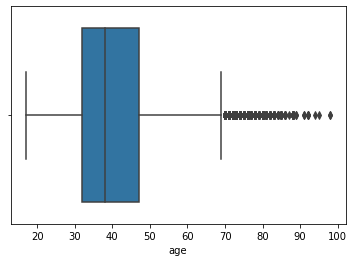

In [33]:
# Menggunakan plot boxplot untuk mengecek outlier pada kolom
sns.boxplot(x=data['age'])

<AxesSubplot:xlabel='duration'>

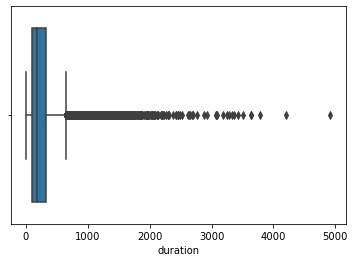

In [34]:
sns.boxplot(x=data['duration'])

<AxesSubplot:xlabel='campaign'>

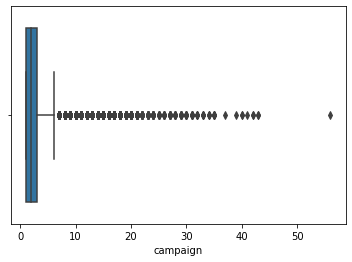

In [35]:
sns.boxplot(x=data['campaign'])

<AxesSubplot:xlabel='pdays'>

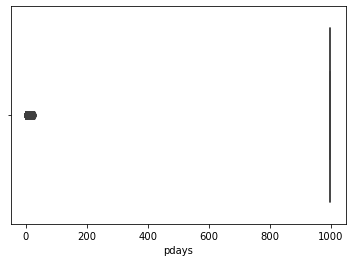

In [36]:
sns.boxplot(x=data['pdays'])

<AxesSubplot:xlabel='previous'>

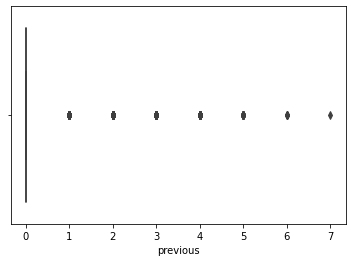

In [37]:
sns.boxplot(x=data['previous'])

Boxplot di atas merupakan visualisasi dari sebaran data yang diwakili oleh variabel Age, Duration, Campaign, Pdays dan Previous. Dari hasil visualisasi diketahui bahwa data memiliki outlier. Untuk itu, lakukan imputasi outlier menggunakan teknik Upper Bound dan Lower Bound atau IQR.

<AxesSubplot:xlabel='age'>

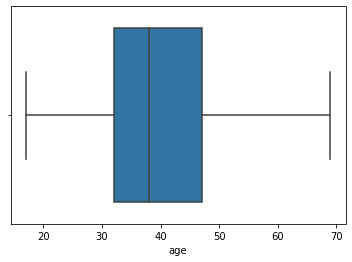

In [38]:
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
data2 = data[~((data['age'] < (Q1 - 1.5 * IQR)) | (data['age']  > (Q3 + 1.5 * IQR)))]
sns.boxplot(x=data2['age'])

<AxesSubplot:xlabel='duration'>

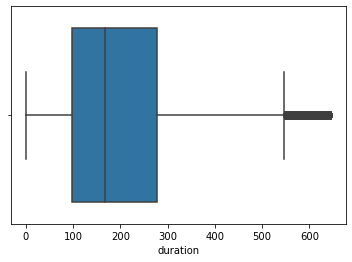

In [39]:
Q1 = data['duration'].quantile(0.25)
Q3 = data['duration'].quantile(0.75)
IQR = Q3 - Q1
data2 = data[~((data['duration'] < (Q1 - 1.5 * IQR)) | (data['duration']  > (Q3 + 1.5 * IQR)))]
sns.boxplot(x=data2['duration'])

<AxesSubplot:xlabel='campaign'>

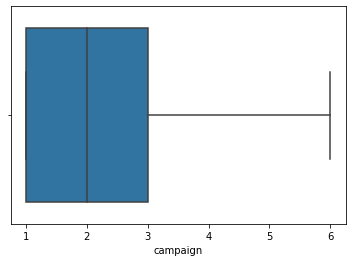

In [40]:
Q1 = data['campaign'].quantile(0.25)
Q3 = data['campaign'].quantile(0.75)
IQR = Q3 - Q1
data2 = data[~((data['campaign'] < (Q1 - 1.5 * IQR)) | (data['campaign']  > (Q3 + 1.5 * IQR)))]
sns.boxplot(x=data2['campaign'])

<AxesSubplot:xlabel='pdays'>

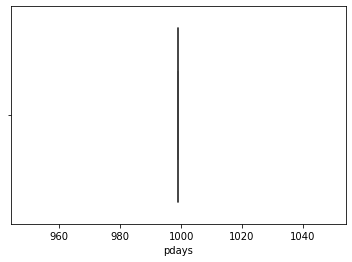

In [41]:
Q1 = data['pdays'].quantile(0.25)
Q3 = data['pdays'].quantile(0.75)
IQR = Q3 - Q1
data2 = data[~((data['pdays'] < (Q1 - 1.5 * IQR)) | (data['pdays']  > (Q3 + 1.5 * IQR)))]
sns.boxplot(x=data2['pdays'])

<AxesSubplot:xlabel='previous'>

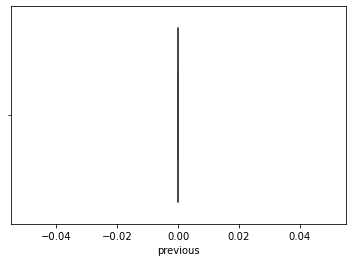

In [42]:
Q1 = data['previous'].quantile(0.25)
Q3 = data['previous'].quantile(0.75)
IQR = Q3 - Q1
data2 = data[~((data['previous'] < (Q1 - 1.5 * IQR)) | (data['previous']  > (Q3 + 1.5 * IQR)))]
sns.boxplot(x=data2['previous'])

Dari hasil diatas terlihat sebagian besar outlier sudah terhapus

In [43]:
#Mengeccek kembali data
data2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,1,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,1,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,1,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,1,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,1,307,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,5,281,1,999,0,nonexistent,yes
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,5,334,1,999,0,nonexistent,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,5,383,1,999,0,nonexistent,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,5,189,2,999,0,nonexistent,no


# Visualization

In [44]:
#membuat tabulasi data dengan membandingkan setiap kolom dengan target
tabulasi = pd.crosstab(data2['job'],data2['y'], margins = True)
tabulasi

y,no,yes,All
job,,,
admin.,8000,900,8900
blue-collar,7739,509,8248
entrepreneur,1175,102,1277
housemaid,881,67,948
management,2279,219,2498
retired,1076,254,1330
self-employed,1131,115,1246
services,3210,239,3449
student,446,148,594


Text(0.5, 1.0, 'Job vs Target')

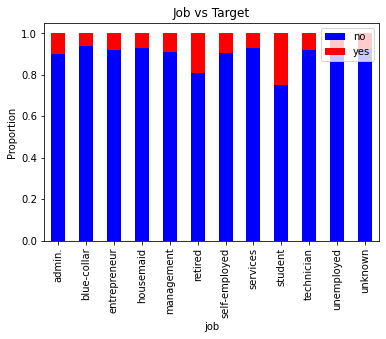

In [45]:
pd.crosstab(data2['job'],data2['y'], normalize='index').plot.bar(rot=90, stacked=True, color=['b','r'])
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.title('Job vs Target')

Pada tabel tabulasi silang antara variabel kategorik ‘Job’ dan ‘Target’, dapat dilihat bahwa dari 35.551 orang, 8.900 orang diantaranya bekerja sebagai admin, 8.248 orang bekerja sebagai blue-collar, 1.277 orang bekerja sebagai wirausaha, 948 orang bekerja sebagai pembantu, 2.498 orang bekerja dibidang manajemen, 1.330 orang pensiun,1.246 orang sebagai wiraswasta, 3.449 orang bekerja dibidang jasa, 594 orang adalah mahasiswa, 5910 orang adalah teknisi, 858 orang adalah pengangguran dan 293 orang tidak diketahui pekerjaannya. Berdasarkan plot diatas diketahui bahwa setiap kategori pekerjaan cenderung menolak.

In [46]:
tabulasi2 = pd.crosstab(data2['marital'],data2['y'], margins = True)
tabulasi2

y,no,yes,All
marital,,,
divorced,3657,323,3980
married,20090,1724,21814
single,8610,1085,9695
unknown,54,8,62
All,32411,3140,35551


Text(0.5, 1.0, 'Marital vsTarget')

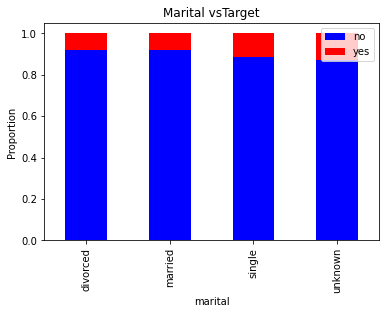

In [47]:
pd.crosstab(data2['marital'],data2['y'], normalize='index').plot.bar(rot=90, stacked=True, color=['b','r'])
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.title('Marital vsTarget')

Pada tabel tabulasi silang antara variabel kategorik ‘Marital’ dan ‘Target’, dapat dilihat bahwa dari 35.551 orang, 3.980 orang diantaranya statusnya telah bercerai, 21.814 orang statusnya sudah menikah, 9.695 orang statusnya masih single atau jomblo,  dan 62 orang tidak diketahui statusnya. Dapat diketahui bahwa bank cenderung mengontak orang yang sudah menikah daripada orang yang sudah bercerai ataupun single. Berdasarkan plot diatas diketahui bahwa setiap kategori status cenderung menolak.

In [48]:
tabulasi3 = pd.crosstab(data2['education'],data2['y'], margins = True)
tabulasi3

y,no,yes,All
education,,,
basic.4y,3409,287,3696
basic.6y,1887,146,2033
basic.9y,4943,361,5304
high.school,7390,709,8099
illiterate,13,3,16
professional.course,4172,382,4554
university.degree,9276,1113,10389
unknown,1321,139,1460
All,32411,3140,35551


Text(0.5, 1.0, 'Education vs Target')

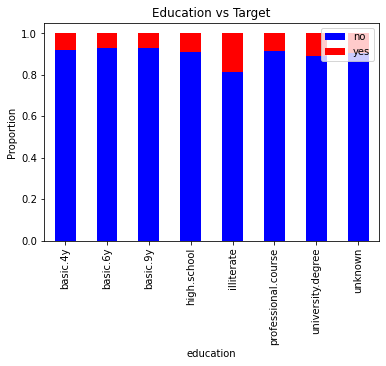

In [49]:
pd.crosstab(data2['education'],data2['y'], normalize='index').plot.bar(rot=90, stacked=True, color=['b','r'])
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.title('Education vs Target')

Pada tabel tabulasi silang antara variabel kategorik ‘Education’ dan ‘Target’, dapat dilihat bahwa dari 35.551 orang, 3.696 orang diantaranya masih pendidikan dasar 4 tahun, 2.033 orang masih pendidikan dasar 6 tahun, 5.304 orang masih pendidikan dasar 9 tahun, 8.099 orang pendidikanya masih SMA , 16 orang buta huruf, 1.460 orang tidak berpendidikan,4.554 orang kursus profesional,  dan 10.389 orang berkuliah. Dapat diketahui bahwa pihak bank cenderung mengontak orang yang sudah berkuliah. Berdasarkan plot diatas diketahui bahwa setiap kategori education cenderung menolak.

In [50]:
tabulasi4 = pd.crosstab(data2['default'],data2['y'], margins = True)
tabulasi4

y,no,yes,All
default,,,
no,24771,2757,27528
unknown,7638,383,8021
yes,2,0,2
All,32411,3140,35551


Text(0.5, 1.0, 'Default vs Target')

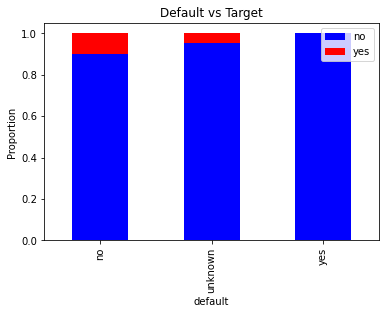

In [51]:
pd.crosstab(data2['default'],data2['y'], normalize='index').plot.bar(rot=90, stacked=True, color=['b','r'])
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.title('Default vs Target')

Pada tabel tabulasi silang antara variabel kategorik ‘Default’ dan ‘Target’, dapat dilihat bahwa dari 35.551 orang, 35.549 orang diantaranya tidak gagal bayar kredit, dan hanya 2 orang yang gagal bayar kredit. Berdasarkan plot diatas diketahui bahwa setiap kategori Default cenderung menolak.

In [52]:
tabulasi5 = pd.crosstab(data2['housing'],data2['y'], margins = True)
tabulasi5

y,no,yes,All
housing,,,
no,14864,1385,16249
unknown,788,63,851
yes,16759,1692,18451
All,32411,3140,35551


Text(0.5, 1.0, 'Housing vs Target')

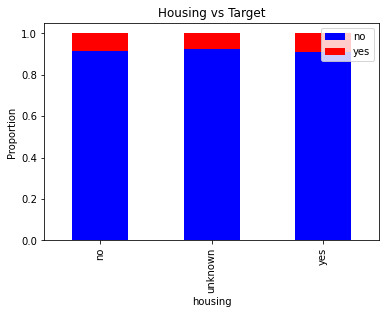

In [53]:
pd.crosstab(data2['housing'],data2['y'], normalize='index').plot.bar(rot=90, stacked=True, color=['b','r'])
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.title('Housing vs Target')

Pada tabel tabulasi silang antara variabel kategorik ‘Housing’ dan ‘Target’, dapat dilihat bahwa dari 35.551 orang, 17.100 orang diantaranya tidak tinggal diperumahan, dan 18.451 orang yang tinggal diperumahan. Berdasarkan plot diatas diketahui bahwa setiap kategori Housing cenderung menolak.

In [54]:
tabulasi6 = pd.crosstab(data2['loan'],data2['y'], margins = True)
tabulasi6

y,no,yes,All
loan,,,
no,26695,2609,29304
unknown,788,63,851
yes,4928,468,5396
All,32411,3140,35551


Text(0.5, 1.0, 'Loan vs Target')

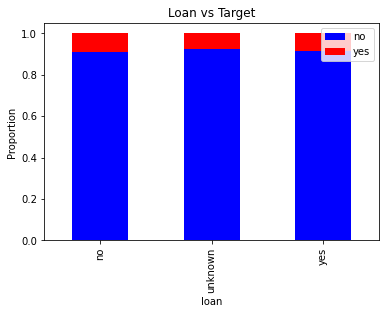

In [55]:
pd.crosstab(data2['loan'],data2['y'], normalize='index').plot.bar(rot=90, stacked=True, color=['b','r'])
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.title('Loan vs Target')

Pada tabel tabulasi silang antara variabel kategorik ‘Loan’ dan ‘Target’, dapat dilihat bahwa dari 35.551 orang, 30.155 orang diantaranya tidak memiliki pinjaman, dan 5.396 orang yang memiliki pinjaman. Berdasarkan plot diatas diketahui bahwa setiap kategori Loan cenderung menolak.

In [56]:
tabulasi7 = pd.crosstab(data2['contact'],data2['y'], margins = True)
tabulasi7

y,no,yes,All
contact,,,
cellular,18460,2453,20913
telephone,13951,687,14638
All,32411,3140,35551


Text(0.5, 1.0, 'Contact vs Target')

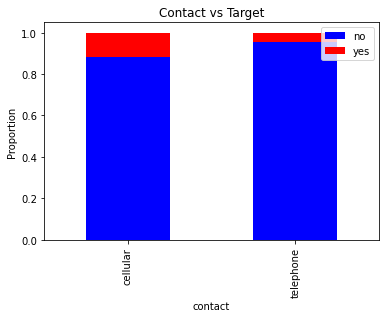

In [57]:
pd.crosstab(data2['contact'],data2['y'], normalize='index').plot.bar(rot=90, stacked=True, color=['b','r'])
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.title('Contact vs Target')

Pada tabel tabulasi silang antara variabel kategorik ‘Contact’ dan ‘Target’, dapat dilihat bahwa dari 35.551 orang, 20.913 orang diantaranya menggunakan komunikasi seluler, dan 14.638 orang menggunakan komunikasi telepon. Berdasarkan plot diatas diketahui bahwa setiap kategori Contact cenderung menolak.

In [58]:
tabulasi8 = pd.crosstab(data2['month'],data2['y'], margins = True)
tabulasi8

y,no,yes,All
month,,,
apr,1476,397,1873
aug,5276,441,5717
dec,52,46,98
jul,6424,517,6941
jun,4593,410,5003
mar,193,174,367
may,11115,643,11758
nov,2847,249,3096
oct,251,162,413


Text(0.5, 1.0, 'Month vs Target')

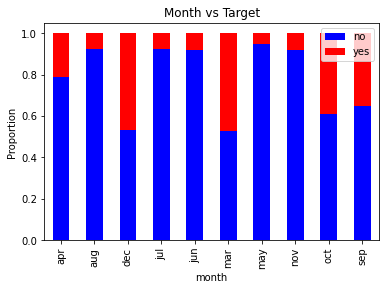

In [59]:
pd.crosstab(data2['month'],data2['y'], normalize='index').plot.bar(rot=90, stacked=True, color=['b','r'])
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.title('Month vs Target')

Pada tabel tabulasi silang antara variabel kategorik ‘Month’ dan ‘Target’, dapat dilihat bahwa dari 35.551 orang, 1.873 orang terakhir dihubungi pada bulan April, 5.717 orang terakhir dihubungi pada bulan Agustus, 98 orang terakhir dihubungi pada bulan December, 6.941 orang terakhir dihubungi pada bulan Juli, 5003 orang terakhir dihubungi pada bulan Juni, 367 orang terakhir dihubungi pada bulan Maret, 11.758 orang terakhir dihubungi pada bulan Mei, 3.096 orang terakhir dihubungi pada bulan November, 413 orang terakhir dihubungi pada bulan Oktober, dan 285 orang terakhir dihubungi pada bulan September. Berdasarkan plot diatas diketahui bahwa setiap kategori Bulan masih tetap cenderung menolak.

In [60]:
tabulasi9 = pd.crosstab(data2['day_of_week'],data2['y'], margins = True)
tabulasi9

y,no,yes,All
day_of_week,,,
1,6777,585,7362
2,6365,625,6990
3,6414,646,7060
4,6735,702,7437
5,6120,582,6702
All,32411,3140,35551


Text(0.5, 1.0, 'Day of Week vs Target')

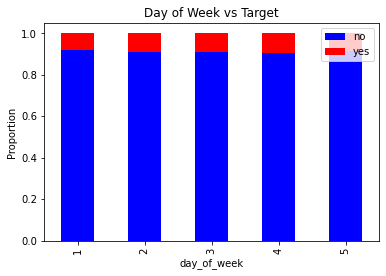

In [61]:
pd.crosstab(data2['day_of_week'],data2['y'], normalize='index').plot.bar(rot=90, stacked=True, color=['b','r'])
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.title('Day of Week vs Target')

Pada tabel tabulasi silang antara variabel kategorik ‘Day of Week’ dan ‘Target’, dapat dilihat bahwa dari 35.551 orang, 7.392 orang terakhir dihubungi pada hari Senin ,6.990 orang terakhir dihubungi pada hari Selasa, 7.060 orang terakhir dihubungi pada hari Rabu, 7.437 orang terakhir dihubungi pada hari Kamis, dan  6.702 orang terakhir dihubungi pada hari Jumat. Berdasarkan plot diatas diketahui bahwa setiap kategori Hari masih cenderung menolak.

In [62]:
tabulasi10 = pd.crosstab(data2['poutcome'],data2['y'], margins = True)
tabulasi10

y,no,yes,All
poutcome,,,
nonexistent,32411,3140,35551
All,32411,3140,35551


Text(0.5, 1.0, 'Poutcome vs Target')

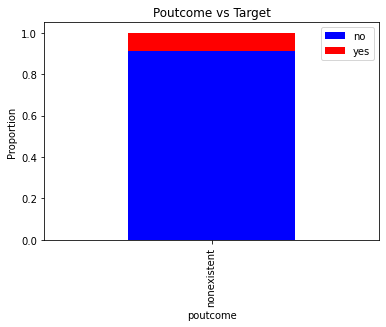

In [63]:
pd.crosstab(data2['poutcome'],data2['y'], normalize='index').plot.bar(rot=90, stacked=True, color=['b','r'])
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.title('Poutcome vs Target')

Pada tabel tabulasi silang antara variabel kategorik ‘poutcome’ dan ‘Target’, dapat dilihat bahwa dari 35.551 orang tidak ada hasil kampanye sebelumnya. Berdasarkan plot diatas diketahui bahwa orang cenderung menolak. Dikarenakan masih didapati penyebaran atribut variabel target tidak seimbang, hal ini dapat mengakibatkan performa model menjadi bias. Untuk itu perlu melakukan proses SMOTING atau oversampling.

In [64]:
# Mengubah atribut unknown pada kolom data dengan modus agar mengurangi oversampling
data2['job'].replace(['unknown'], data2['default'].mode(), inplace=True)
data2['marital'].replace(['unknown'], data2['default'].mode(), inplace=True)
data2['education'].replace(['unknown'], data2['default'].mode(), inplace=True)
data2['default'].replace(['unknown'], data2['default'].mode(), inplace=True)
data2['housing'].replace(['unknown'], data2['default'].mode(), inplace=True)
data2['loan'].replace(['unknown'], data2['default'].mode(), inplace=True)

Text(0.5, 1.0, 'Job vs Target')

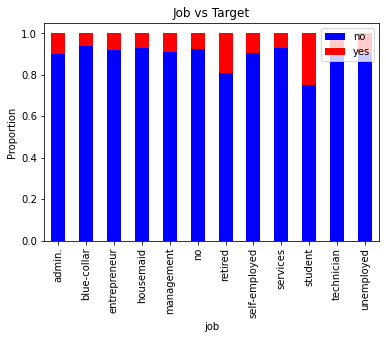

In [65]:
pd.crosstab(data2['job'],data2['y'], normalize='index').plot.bar(rot=90, stacked=True, color=['b','r'])
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.title('Job vs Target')

Text(0.5, 1.0, 'Job vs Target')

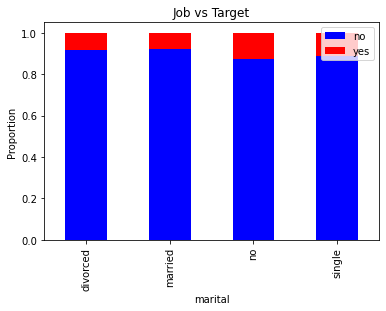

In [66]:
pd.crosstab(data2['marital'],data2['y'], normalize='index').plot.bar(rot=90, stacked=True, color=['b','r'])
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.title('Job vs Target')

Text(0.5, 1.0, 'Job vs Target')

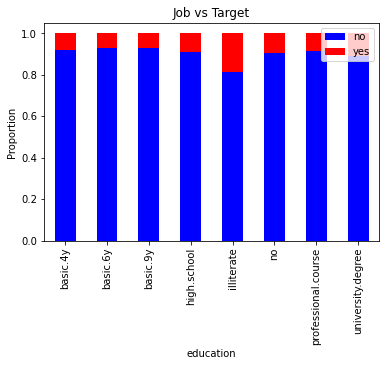

In [67]:
pd.crosstab(data2['education'],data2['y'], normalize='index').plot.bar(rot=90, stacked=True, color=['b','r'])
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.title('Job vs Target')

Text(0.5, 1.0, 'Default vs Target')

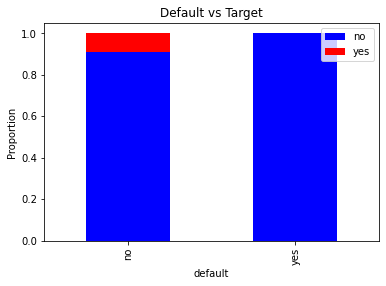

In [68]:
pd.crosstab(data2['default'],data2['y'], normalize='index').plot.bar(rot=90, stacked=True, color=['b','r'])
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.title('Default vs Target')

Text(0.5, 1.0, 'Housing vs Target')

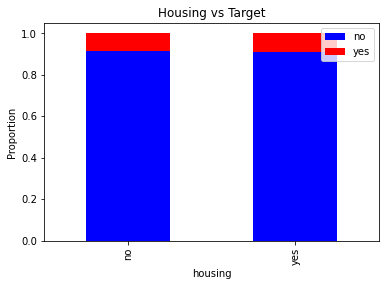

In [69]:
pd.crosstab(data2['housing'],data2['y'], normalize='index').plot.bar(rot=90, stacked=True, color=['b','r'])
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.title('Housing vs Target')

Text(0.5, 1.0, 'Loan vs Target')

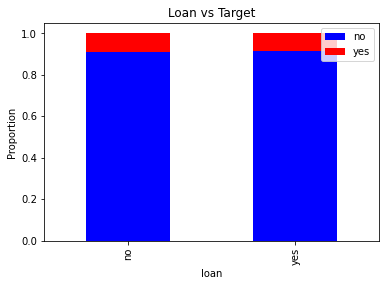

In [70]:
pd.crosstab(data2['loan'],data2['y'], normalize='index').plot.bar(rot=90, stacked=True, color=['b','r'])
plt.legend(loc='upper right')
plt.ylabel('Proportion')
plt.title('Loan vs Target')

Setelah dilakukan perubahan pada atribut unknown maka sudah didapati tidak adanya data yang oversampling karena nilai 'unknown' pada data 

In [71]:
# Melakukan drop data lagi pada data yang tidak berpengaruh dan tidak digunakan
data2.drop(columns = ['month', 'previous', 'day_of_week', 'pdays', 'poutcome'], inplace = True)
data2.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,261,1,no
1,57,services,married,high.school,no,no,no,telephone,149,1,no
2,37,services,married,high.school,no,yes,no,telephone,226,1,no
3,40,admin.,married,basic.6y,no,no,no,telephone,151,1,no
4,56,services,married,high.school,no,no,yes,telephone,307,1,no


In [72]:
# Mengubah label data kategorik menjadi numerik menggunakan label Encoder
from sklearn.preprocessing import LabelEncoder
data2['job'] = LabelEncoder().fit_transform(data2['job'])
data2['marital'] = LabelEncoder().fit_transform(data2['marital'])
data2['education'] = LabelEncoder().fit_transform(data2['education'])
data2['y'] = LabelEncoder().fit_transform(data2['y'])

In [73]:
# Mengubal label data 'yes' 'no' menjadi 1 dan 0
data2['default'].replace(['yes', 'no'], [1, 0], inplace=True)
data2['housing'].replace(['yes', 'no'], [1, 0], inplace=True)
data2['loan'].replace(['yes', 'no'], [1, 0], inplace=True)
data2['contact'].replace(['telephone', 'cellular'], [1, 0], inplace=True)

In [74]:
#mengecek data setelah dirubah
data2

,age,job,marital,education,default,housing,loan,contact,duration,campaign,y
0,56,3,1,0,0,0,0,1,261,1,0
1,57,8,1,3,0,0,0,1,149,1,0
2,37,8,1,3,0,1,0,1,226,1,0
3,40,0,1,1,0,0,0,1,151,1,0
4,56,8,1,3,0,0,1,1,307,1,0
...,...,...,...,...,...,...,...,...,...,...,...
41181,37,0,1,7,0,1,0,0,281,1,1
41183,73,6,1,6,0,1,0,0,334,1,1
41184,46,1,1,6,0,0,0,0,383,1,0
41185,56,6,1,7,0,1,0,0,189,2,0


# Pre Processing

In [75]:
#Mengimport libraries yang akan digunakan untuk membagi data agar bisa melakukan prediksi 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

x = data2.drop('y', axis = 1) 
y = data2.loc[:, 'y']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)# Membagi data menjadi dua

Dalam hal ini dilakukan pemisahan data dengan ukuran data testing adalah 30% dan ukuran data training adalah 70%  yang diambil secara acak dengan nomor generator 1. Nomor ini menandakan nomor pengacakan agar jika di run kembali, pengacakan data akan tetap sama. Data training (X_train, Y_train) berguna untuk membangun model yang hasilnya akan digunakan untuk memprediksi X_test, kemudian hasil prediksinya dievaluasi dengan mengacu pada Y_test

In [76]:
#dikarenakan masih terdapat data yang over sampling sehingga perlu dilakukan smoting
from imblearn.over_sampling import SMOTE

oversampling = SMOTE(random_state = 1)
X_train_oversampling, y_train_oversampling = oversampling.fit_resample(X_train, y_train)

In [77]:
# Mengimport libraries untuk melakukan Klasifikasi 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics

In [78]:
# Dimensi X dan Y
print("Shape of X:",x.shape)
print("Shape of y:",y.shape)

Shape of X: (35551, 10)
Shape of y: (35551,)


# Decision Tree

In [79]:
#Model Decision Tree
dtmodel = DecisionTreeClassifier(random_state=10)

dtmodel.fit(X_train_oversampling,y_train_oversampling)
dtmodel.score(X_train_oversampling,y_train_oversampling)

0.9996913852393968

Hasil akurasi model decision tree pada data train menunjukkan nilai sebesar
0.99. Ini berarti sebesar 99% dari data train dapat diprediksi dengan tepat.

In [84]:
# Prediksi akurasi model pada data Test
dtmodel.score(X_test,y_test)

0.8487717982373898

Hasil akurasi model decision tree pada data test menunjukkan nilai sebesar 0.84. Ini berarti sebesar 84% dari data test dapat diprediksi dengan tepat.

In [164]:
modeltree=DecisionTreeClassifier(criterion="entropy", random_state=10, max_depth=3, min_samples_leaf=5)
modeltree.fit(X_train_oversampling,y_train_oversampling)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=10)

Digunakan metode klasifikasi data dengan Decision Tree atau pohon klasifikasi yang berfungsi untuk mengidentifikasi variabel apa yang dapat dijadikan sebagai pembeda antar kelas dan memprediksi keanggotaan kelas suatu  amatan berdasarkan karakteristiknya. Dalam pemisahan pohon biasanya jumlah simpul sepanjang jalur terpanjang dari simpul akar sampai ke simpul daun terjauh adalah 3 tingkat dan pemisahan berhenti jika daun berisi kurang dari 5 amatan.

[Text(0.5, 0.875, 'Duration <= 393.5\nentropy = 1.0\nsamples = 45364\nvalue = [22682, 22682]\nclass = Not Subcribed'),
 Text(0.25, 0.625, 'Contact <= 0.5\nentropy = 0.866\nsamples = 27558\nvalue = [19632, 7926]\nclass = Not Subcribed'),
 Text(0.125, 0.375, 'Duration <= 105.5\nentropy = 0.974\nsamples = 18918\nvalue = [11240, 7678]\nclass = Not Subcribed'),
 Text(0.0625, 0.125, 'entropy = 0.443\nsamples = 4219\nvalue = [3831, 388]\nclass = Not Subcribed'),
 Text(0.1875, 0.125, 'entropy = 1.0\nsamples = 14699\nvalue = [7409, 7290]\nclass = Not Subcribed'),
 Text(0.375, 0.375, 'Duration <= 89.5\nentropy = 0.188\nsamples = 8640\nvalue = [8392, 248]\nclass = Not Subcribed'),
 Text(0.3125, 0.125, 'entropy = 0.005\nsamples = 2308\nvalue = [2307, 1]\nclass = Not Subcribed'),
 Text(0.4375, 0.125, 'entropy = 0.238\nsamples = 6332\nvalue = [6085, 247]\nclass = Not Subcribed'),
 Text(0.75, 0.625, 'Contact <= 0.5\nentropy = 0.661\nsamples = 17806\nvalue = [3050, 14756]\nclass = Yes Subcribed'),
 Te

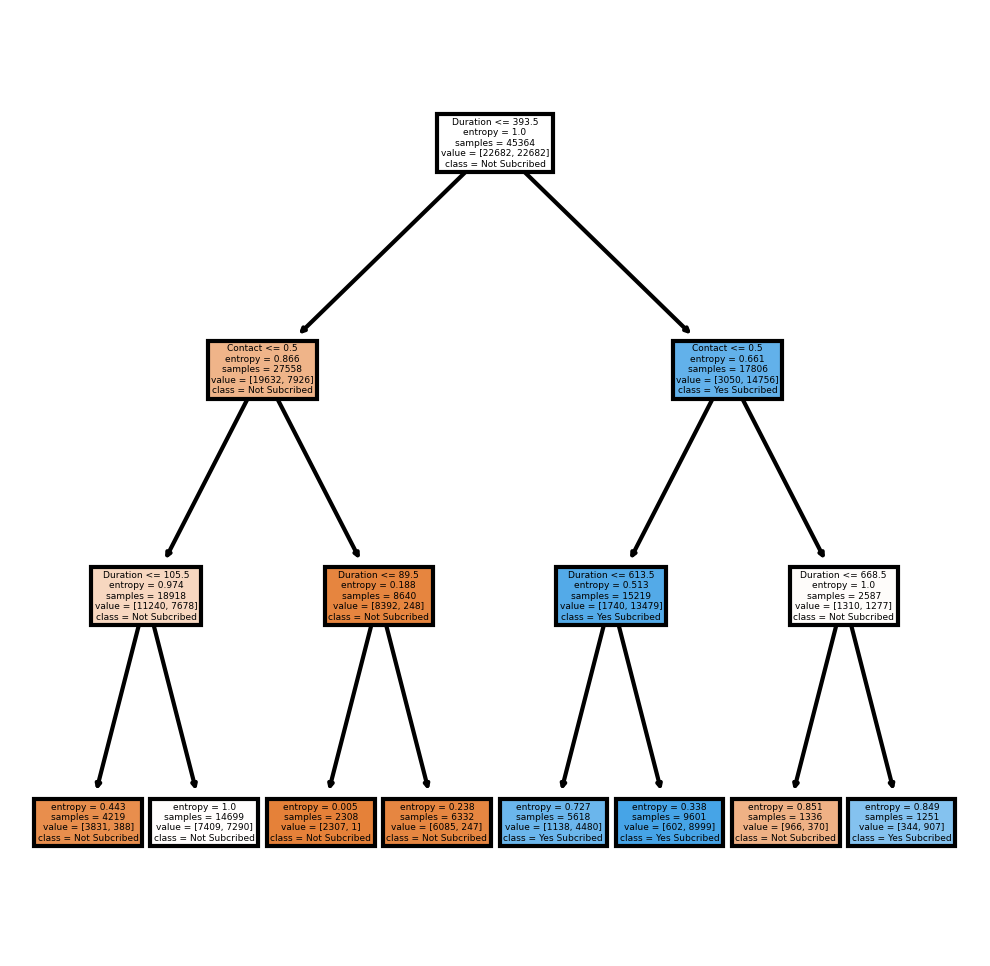

In [165]:
# Membuat Diagram pohon klasifikasi
fn=['Age','Job','Marital','Education','Default','Housing','Loan','Contact','Duration','Campaign']
cn=['Not Subcribed','Yes Subcribed']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(modeltree,feature_names=fn,class_names=cn,filled=True)

Diagram pohon di atas memberikan informasi sebagai berikut, 
1. Prediktor (variabel X) terbaik yang bisa membedakan antara orang yang akan berlangganan dan tidak berlangganan.
2. Prediktor yang muncul dalam diagram pohon merupakan variabel yang mampu membedakan antara orang yang akan berlangganan dan tidak berlangganan, yaitu  Duration dan Contact. 
3. Pelanggan dengan Duration ≤ 393.5 detik cenderung tidak berlangganan. 
4. Pelanggan dengan Duration > 393.5 detik cenderung berlangganan.

In [119]:
# Membuat Confusion matrix untuk menampilkan jumlah prediksi yang benar dan salah
confusion_matrix(y_test, dtmodel.predict(X_test))

array([[8634, 1095],
       [ 518,  419]], dtype=int64)

In [120]:
# Menampilkan perbandingan hasil prediksi
print(classification_report(y_test, dtmodel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      9729
           1       0.28      0.45      0.34       937

    accuracy                           0.85     10666
   macro avg       0.61      0.67      0.63     10666
weighted avg       0.88      0.85      0.86     10666



# Logistic Regression

In [88]:
#Model Regresi Logistik
lrmodel = LogisticRegression(solver='liblinear', random_state=0,C=10.0)
lrmodel.fit(X_train_oversampling,y_train_oversampling)
lrmodel.score(X_train_oversampling,y_train_oversampling)

0.8294021691208888

Hasil akurasi model Logistic Regression pada data train menunjukkan nilai sebesar 0.82. Ini berarti sebesar 82% dari data train dapat diprediksi dengan tepat.

In [89]:
lrmodel.score(X_test,y_test)

0.8170823176448528

Hasil akurasi model Logistic Regression pada data test menunjukkan nilai sebesar 0.81. Ini berarti sebesar 81% dari data test dapat diprediksi dengan tepat.

In [90]:
# Membuat Confusion matrix untuk menampilkan jumlah prediksi yang benar dan salah
confusion_matrix(y_test, lrmodel.predict(X_test))

array([[8083, 1646],
       [ 305,  632]], dtype=int64)

In [118]:
# Menampilkan perbandingan hasil prediksi
print(classification_report(y_test, lrmodel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      9729
           1       0.28      0.67      0.39       937

    accuracy                           0.82     10666
   macro avg       0.62      0.75      0.64     10666
weighted avg       0.90      0.82      0.85     10666



Hasil Classification Report diatas menunjukkan bahwa untuk precision, recall dan f1-score dari 1 sangat rendah dibandingkan dengan 0

# K Nearest Neighbor

In [125]:
#Model KNN dengan 5 kelas
knnmodel = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ]
)

In [122]:
knnmodel.fit(X_train_oversampling, y_train_oversampling)

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [100]:
y_pred = knnmodel.predict(X_test)

In [101]:
knnmodel.score(X_test, y_test)

0.8414588411775736

Hasil akurasi model KNN dengan 5 kelas pada data testing menunjukkan nilai sebesar 0.84. Ini berarti sebesar 84% dari data testing dapat diprediksi dengan tepat.

In [123]:
# Membuat Confusion matrix untuk menampilkan jumlah prediksi yang benar dan salah
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[8468, 1261],
       [ 430,  507]], dtype=int64)

In [124]:
# Menampilkan perbandingan hasil prediksi
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91      9729
           1       0.29      0.54      0.37       937

    accuracy                           0.84     10666
   macro avg       0.62      0.71      0.64     10666
weighted avg       0.89      0.84      0.86     10666



Hasil Classification Report diatas menunjukkan bahwa untuk precision, recall dan f1-score dari 1 sangat rendah dibandingkan dengan 0

In [126]:
#Model KNN dengan 7 kelas
knnmodel2 = Pipeline(
    steps=[
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=7))
    ]
)

In [127]:
knnmodel2.fit(X_train_oversampling,y_train_oversampling)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=7))])

In [115]:
knnmodel2.score(X_test,y_test)

0.8387399212450778

Hasil akurasi model KNN dengan 7 kelas pada data testing menunjukkan nilai sebesar 0.83. Ini berarti sebesar 83% dari data testing dapat diprediksi dengan tepat.

# Support Vector Machine 

In [129]:
#Model SVM
svcmodel = SVC(C=10.0,kernel='rbf')
svcmodel.fit(X_train_oversampling, y_train_oversampling)

SVC(C=10.0)

In [163]:
y_pred = svcmodel.predict(X_test)

In [160]:
svcmodel.score(X_test,y_test)

0.8052690793174574

Hasil akurasi model SVM pada data testing menunjukkan nilai sebesar 0.80. Ini berarti sebesar 80% dari data testing dapat diprediksi dengan tepat.

In [161]:
# Membuat Confusion matrix untuk menampilkan jumlah prediksi yang benar dan salah
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[7903, 1826],
       [ 251,  686]], dtype=int64)

In [162]:
# Menampilkan perbandingan hasil prediksi
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      9729
           1       0.27      0.73      0.40       937

    accuracy                           0.81     10666
   macro avg       0.62      0.77      0.64     10666
weighted avg       0.91      0.81      0.84     10666



Hasil Classification Report diatas menunjukkan bahwa untuk precision dan f1-score dari 1 sangat rendah namun untuk recallnya lumayan tinggi namun masih lebih rendah dibandingkan dengan 0 

# Naive Bayes

In [131]:
#Model Baive Bayes
nbmodel = GaussianNB()

In [132]:
nbmodel.fit(X_train_oversampling,y_train_oversampling)

GaussianNB()

In [133]:
nbmodel.score(X_train_oversampling,y_train_oversampling)

0.751961908120977

Hasil akurasi model Naive Bayes pada data train menunjukkan nilai sebesar 0.75. Ini berarti sebesar 75% dari data train dapat diprediksi dengan tepat.

In [135]:
nbmodel.score(X_test,y_test)

0.5922557659853741

Hasil akurasi model Naive Bayes pada data testing menunjukkan nilai sebesar 0.59. Ini berarti sebesar 59% dari data testing dapat diprediksi dengan tepat. Persentase ini sangat rendah dibandingkan dengan model prediksi yang lain sehingga untuk Naive Bayes tidak cocok digunakan untuk memprediksi orang yang akan berlangganan dan tidak berlangganan

In [148]:
y_pred = nbmodel.predict(X_test)

In [156]:
# Membuat Confusion matrix untuk menampilkan jumlah prediksi yang benar dan salah
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[7903, 1826],
       [ 251,  686]], dtype=int64)

In [158]:
# Menampilkan perbandingan hasil prediksi
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      9729
           1       0.27      0.73      0.40       937

    accuracy                           0.81     10666
   macro avg       0.62      0.77      0.64     10666
weighted avg       0.91      0.81      0.84     10666



Hasil Classification Report diatas menunjukkan bahwa untuk precision dan f1-score dari 1 sangat rendah namun untuk recallnya lumayan tinggi namun masih lebih rendah dibandingkan dengan 0, hal ini memang berbanding lurus dengan hasil prediksi pada data testing yang rendah

# Random Forest Classifier

In [137]:
#Model Random Forest
rfmodel = RandomForestClassifier(n_estimators=100, random_state=10)

In [138]:
rfmodel.fit(X_train_oversampling, y_train_oversampling)

RandomForestClassifier(random_state=10)

In [139]:
print("Train Score: ", rfmodel.score(X_train_oversampling,y_train_oversampling))
print("Test Score: ", rfmodel.score(X_test,y_test))

Train Score:  0.9996913852393968
Test Score:  0.8770860678792425


Hasil akurasi model Random Forest pada data train menunjukkan nilai sebesar 0.99. Ini berarti sebesar 99% dari data train dapat diprediksi dengan tepat. Sedangkan haasil akurasi Random Forest pada data testing menunjukkan nilai sebesar 0.87. Ini berarti sebesar 87% dari data testing dapat diprediksi dengan tepat.

In [145]:
y_pred = rfmodel.predict(X_test)

In [159]:
# Membuat Confusion matrix untuk menampilkan jumlah prediksi yang benar dan salah
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[7903, 1826],
       [ 251,  686]], dtype=int64)

In [144]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      9729
           1       0.36      0.51      0.42       937

    accuracy                           0.88     10666
   macro avg       0.65      0.71      0.68     10666
weighted avg       0.90      0.88      0.89     10666



# KESIMPULAN

Pemilihan model terbaik pada kasus ini dapat ditinjau dari akurasi tertinggi yakni model Random Forest yang mempunyai ketepatan prediksi data testing 87%. Sedangkan untuk model kedua terbaik pada proses klasifikasi ini adalah model Decision Tree dan KNN yang masing-masing mempunyai ketepatan prediksi data testing sebesar 84% dan 83%. Adapun untuk penggunaan metode Random Forest belum dapat dikatakan sebagai metode terbaik, karena masih belum mendekati nilai akurasi yang sempurna 100%